In [1]:
import pandas as pd
import numpy as np
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# EDA

In [2]:
email=pd.read_csv("emails1")
email.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [3]:
email.tail()

,Unnamed: 0,filename,Message-ID,content,Class
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive
48075,48075,campbell-l/notes_inbox/137.,<10677824.1075857876692.JavaMail.evans@thyme>,---------------------- Forwarded by Tamara Jae...,Non Abusive


In [4]:
# Data Structure
type(email)

pandas.core.frame.DataFrame

In [5]:
email.shape

(48076, 5)

In [6]:
# Datatypes
email.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

# Datatype Conversion

In [7]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
email.drop(columns=['Unnamed: 0','filename','Message-ID'], inplace=True)

In [9]:
email.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [10]:
# Checking for null values
email.isnull().sum()

content    0
Class      0
dtype: int64

In [11]:
# Count of duplicated rows
email[email.duplicated()].shape

(23420, 2)

In [12]:
email.duplicated().sum()

23420

In [13]:
email.drop_duplicates(keep='first',inplace= True)

In [14]:
email.duplicated().sum()

0

In [15]:
email.Class.value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

# Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
email['Class'] = encoder.fit_transform(email['Class'])
email

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0
...,...,...
47974,Do you need new leads for your business ?\n D...,1
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",1
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,1
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,1


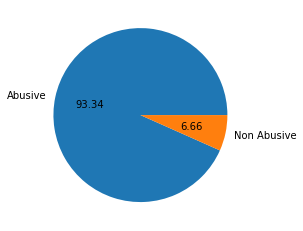

In [18]:
plt.pie(email['Class'].value_counts(),labels=['Abusive','Non Abusive'],autopct='%0.2f')
plt.show()

Data is imbalanced

In [19]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# To check number of characters in the content of the email
email['Char_length']= email['content'].apply(len)
email.head()

,content,Class,Char_length
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [21]:
# Word Count
email['Word_count'] = email['content'].apply(lambda x:len(nltk.word_tokenize(x)))
email.head()

,content,Class,Char_length,Word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [22]:
# Describe for Non Abusive emails
email[['Char_length','Word_count']].describe()

,Char_length,Word_count
count,24656.000000,24656.000000
mean,1798.708306,340.351882
std,5394.644531,818.222258
min,1.000000,1.000000
25%,264.000000,51.000000
50%,729.000000,142.000000
75%,1748.000000,344.000000
max,272036.000000,32296.000000


In [23]:
# Non Abusive
email[email['Class']==1][['Char_length','Word_count']].describe()

,Char_length,Word_count
count,23014.000000,23014.000000
mean,1806.440297,340.184496
std,5532.160062,832.095511
min,1.000000,1.000000
25%,271.000000,51.000000
50%,737.500000,143.000000
75%,1728.000000,339.000000
max,272036.000000,32296.000000


In [24]:
# Abusive
email[email['Class']==0][['Char_length','Word_count']].describe()

,Char_length,Word_count
count,1642.000000,1642.000000
mean,1690.338002,342.697929
std,2834.633786,590.602864
min,5.000000,1.000000
25%,183.000000,40.250000
50%,597.500000,123.000000
75%,2121.000000,434.750000
max,35528.000000,7112.000000


<AxesSubplot:xlabel='Char_length', ylabel='Count'>

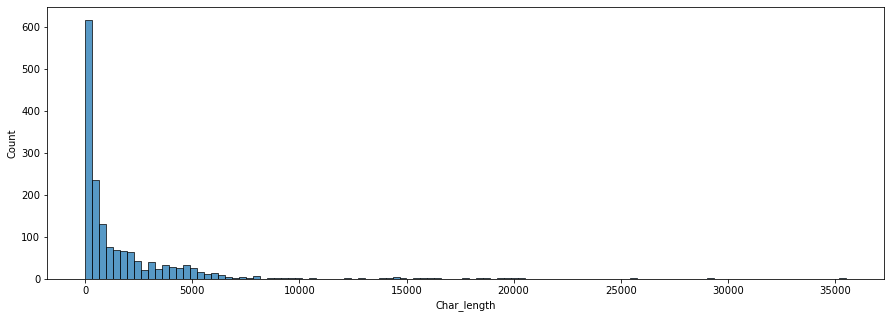

In [25]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(email[email['Class']==0]['Char_length'])

<AxesSubplot:xlabel='Char_length', ylabel='Count'>

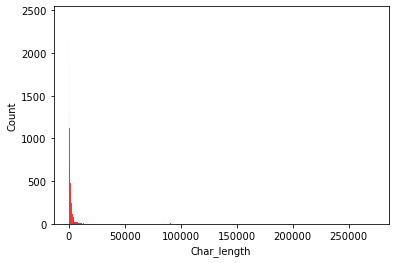

In [26]:
sns.histplot(email[email['Class']==1]['Char_length'],color='red')

In [27]:
email.corr()

,Class,Char_length,Word_count
Class,1.000000,0.005366,-0.000766
Char_length,0.005366,1.000000,0.834617
Word_count,-0.000766,0.834617,1.000000


<AxesSubplot:>

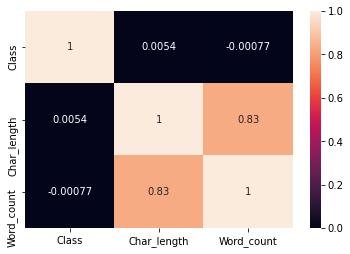

In [28]:
sns.heatmap(email.corr(),annot=True)

# TEXT PROCESSING (Clean, Tokenize and Normalise)

In [29]:
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
STOPWORDS=set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def tokenize(text):

   #1. Normalize the data by converting to lower case and removing punctuations
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
   #2. Tokenizing: split text into words
    tokens = word_tokenize(text)
    
   #3. Remove stop words
    words = [w for w in tokens if w not in STOPWORDS]
    
    #4. Lemmatize 
    lemmed_words = [lemmatizer.lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    text = " ".join(clean_tokens)
    return text

In [31]:
email['cleantext']=email['content'].apply(lambda x: tokenize(x))

In [32]:
email

,content,Class,Char_length,Word_count,cleantext
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,eat shit john j lavorato excelr pm john arnold...
1,fuck you,0,8,2,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,505,163,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,asshole john j lavorato excelr john arnold hou...
...,...,...,...,...,...
47974,Do you need new leads for your business ?\n D...,1,1523,255,need new lead business need increased internet...
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",1,1126,244,image image image garth brook wrapped image im...
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,1,892,164,image image image dear smartreminders member i...
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,1,932,189,image image image image kid rock forever image...


In [33]:
# assigning the independent features to X and the target variable to y
X = email.iloc[:,4]
y = email.iloc[:,1]

In [34]:
X.head()

0    eat shit john j lavorato excelr pm john arnold...
1                                                 fuck
2    gentleman following champagne available approx...
3    sorry taken long trying fend chick life sooooo...
4    asshole john j lavorato excelr john arnold hou...
Name: cleantext, dtype: object

In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [36]:
type(X)

pandas.core.series.Series

# Data Balancing

In [37]:
# Converting X from series to 2D array
# This step being done as smote considers only 2D array as input
X=X.values.reshape(-1,1)

In [38]:
from imblearn.over_sampling import SMOTEN
oversample= SMOTEN(sampling_strategy=0.33)
X1,y1=oversample.fit_resample(X,y)

In [39]:
from collections import Counter
print(Counter(y))

Counter({1: 23014, 0: 1642})


In [40]:
print(Counter(y1))

Counter({1: 23014, 0: 7594})


# Split the dataset into Training and Testing datasets

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (21425, 1)
Shape of testing data: (9183, 1)


In [43]:
print(type(X_train))
print('Dimension of X_train:',X_train.ndim)

<class 'numpy.ndarray'>
Dimension of X_train: 2


In [44]:
# Converting 2D array to 1D array
x_train= X_train.ravel()
x_test= X_test.ravel()

In [45]:
print('Dimension of x_train:',x_train.ndim)

Dimension of x_train: 1


# CountVectorizer - Feature Extraction

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=10000)

In [47]:
x_train= tfidf.fit_transform(x_train).toarray()

In [48]:
x_test = tfidf.transform(x_test).toarray()

In [49]:
x_train.shape

(21425, 10000)

# Model Building

# Decision Tree

In [59]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
clf2= tree.DecisionTreeClassifier()
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Other Metrics:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2294
           1       0.98      0.98      0.98      6889

    accuracy                           0.98      9183
   macro avg       0.97      0.97      0.97      9183
weighted avg       0.98      0.98      0.98      9183



In [61]:
print(confusion_matrix(y_test, y_pred))

[[2189  105]
 [ 121 6768]]


In [ ]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(clf5,open('dec_model.pkl','wb'))

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
clf5= LogisticRegression(max_iter=2000)
clf5.fit(x_train,y_train)
y_pred = clf5.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2294
           1       0.96      1.00      0.98      6889

    accuracy                           0.97      9183
   macro avg       0.98      0.94      0.96      9183
weighted avg       0.97      0.97      0.97      9183



In [54]:
print(confusion_matrix(y_test, y_pred))

[[2028  266]
 [   5 6884]]


In [56]:
import pickle
pickle.dump(tfidf,open('vectors.pkl','wb'))
pickle.dump(clf5,open('Lin_model.pkl','wb'))